In [1]:
import numpy as np
import pandas as pd
import torch
from gcn_model import GCNModel
import utilities
from test_model import test_model
import os
import seaborn as sns
import matplotlib.pyplot as plt

/home/users/lewinsda/.conda/envs/daniel_thesis_2/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
grid_results = pd.read_csv("grid_search_0.7_output/combined.csv", header=None, index_col=0)
grid_results.columns = ["Total Accuracy", "Train Accuracy", "Test Accuracy", "Config", "Dropout", "Batch", "Neighbors"]

In [3]:
# add layer and embedding columns
#grid_results['Config'].apply(str.split("_"))
grid_results['GCN Layers'] = grid_results['Config'].apply(lambda x: x.split('_')[0])
grid_results['Final Embedding'] = grid_results['Config'].apply(lambda x: x.split('_')[1].split(".")[0])

In [4]:
grid_results.sort_values("Test Accuracy", ascending=False).head(50)

,Total Accuracy,Train Accuracy,Test Accuracy,Config,Dropout,Batch,Neighbors,GCN Layers,Final Embedding
0,,,,,,,,,
649,0.966967,0.972497,0.911111,2_15.txt,0.0,20,2,2,15
577,0.965966,0.972497,0.900000,3_40.txt,0.0,20,2,3,40
894,0.965966,0.972497,0.900000,4_60.txt,0.0,95,2,4,60
160,0.965966,0.972497,0.900000,4_40.txt,0.0,65,2,4,40
5,0.964965,0.972497,0.888889,3_8.txt,0.0,35,2,3,8
24,0.964965,0.972497,0.888889,3_8.txt,0.0,80,5,3,8
370,0.964965,0.972497,0.888889,3_15.txt,0.0,50,2,3,15
505,0.964965,0.972497,0.888889,2_40.txt,0.0,20,2,2,40
299,0.964965,0.972497,0.888889,3_60.txt,0.0,50,5,3,60


<AxesSubplot:xlabel='Dropout', ylabel='Test Accuracy'>

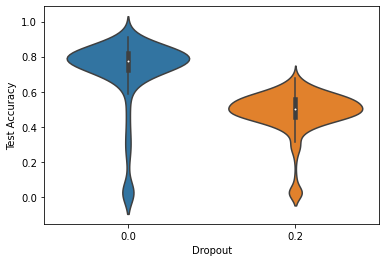

In [5]:
sns.violinplot(x=grid_results["Dropout"], y=grid_results["Test Accuracy"])

[[<AxesSubplot:> <AxesSubplot:>]
 [<AxesSubplot:> <AxesSubplot:>]]


<AxesSubplot:xlabel='Final Embedding', ylabel='Test Accuracy'>

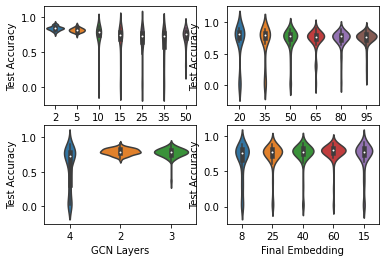

In [14]:
grid_results = grid_results[grid_results['Dropout'] == 0.0]
# call regplot on each axes
#fig, (ax1, ax2, ax3, ax4) = plt.subplots(2,2)
fig, axs = plt.subplots(2,2)
sns.violinplot(x=grid_results["Neighbors"], y=grid_results["Test Accuracy"], ax = axs[0][0])
sns.violinplot(x=grid_results["Batch"], y=grid_results["Test Accuracy"], ax = axs[0][1])
sns.violinplot(x=grid_results["GCN Layers"], y=grid_results["Test Accuracy"], ax = axs[1][0])
sns.violinplot(x=grid_results["Final Embedding"], y=grid_results["Test Accuracy"], ax = axs[1][1])